# **Лабораторна робота №4**
## з дисципліни **"Методи оптимізації та дослідження операцій"**

##### *За темою:* **"Методи спряжених напрямів. Метод спряжених градієнтів"**

<div style="display: flex;">

<div style="flex: 1;">
    <i>Виконавці роботи:</i><br>
    бригада №15
    <br><br>
    <i><b>
    Баштовий Іван<br>
    Гавлицький Іван<br>
    Харитонов Олександр<br>
    Ходаковський Артур
    </i></b>
</div>

<div style="flex: 1;">
<i>Прийняли:</i>
<br><br><br><br>
<i><b>Яковлєва А. П.</i></b><br>
<i><b>Спекторський І. Я.</i></b>
</div>

</div>

Метод збіжних градієнтів (CG) - це ітераційна техніка, яка використовується для розв'язання систем лінійних рівнянь, зокрема, великих, розріджених, симетричних позитивно визначених матриць.

Як він працює ?

$$
$$


1. **Ініціалізація**: Починаємо з початкової припущеної вектора розв'язку 
** \(x_0\) та вектора залишкових компонентів \(r_0\), який є різницею між фактичним розв'язком та поточним наближенням.

2. **Ітерація**: Повторюємо наступні кроки до досягнення збіжності або досягнення максимальної кількості ітерацій:

    a. **Обчислюємо напрямок пошуку**: На кожній ітерації обчислюємо вектор напрямку пошуку \(p_k\), який є спряженим до попереднього напрямку пошуку. Це забезпечує ортогональність напрямків пошуку відносно внутрішнього добутку матриці. Спряжений напрямок \(p_k\) обчислюється як:
    $$ p_k = r_k + \beta_k p_{k-1} $$
    де \(r_k\) - поточний вектор залишкових компонентів, а \(\beta_k) - скаляр.

    b. **Визначаємо розмір кроку**: Обчислюємо розмір кроку вздовж напрямку пошуку \(p_k\), щоб мінімізувати залишок у цьому напрямку. Цей розмір кроку, як правило, визначається шляхом мінімізації залишку вздовж напрямку пошуку, що призводить до простої одновимірної оптимізаційної задачі.

    c. **Оновлюємо розв'язок**: Оновлюємо вектор розв'язку, використовуючи обчислений розмір кроку та напрямок пошуку:
    $$ x_{k+1} = x_k + \alpha_k p_k $$
    де \(\alpha_k\) - розмір кроку, визначений на попередньому кроці.

    d. **Оновлюємо залишкові компоненти**: Обчислюємо новий вектор залишкових компонентів:
    $$ r_{k+1} = r_k - \alpha_k A p_k $$
    де \(A\) - матриця, яка представляє систему рівнянь.

    e. **Перевіряємо збіжність**: Зупиняємо ітерацію, якщо вектор залишкових компонентів достатньо малий або досягнута максимальна кількість ітерацій.

3. **Збіжність**: Метод CG гарантує збіжність до точного розв'язку за найбільш \(n\) ітерацій, де \(n\) - розмір системи рівнянь, якщо матриця \(A\) є симетричною та позитивно визначеною. Однак на практиці CG часто збігається набагато швидше, особливо для добре умовних систем.

$$


## Цільова функція та Градієнт

Задана цільова функція має вигляд:
$$ f(x, y, z) = 12x^2 + 18y^2 + 3z^2 - 0.01xz + x - y $$

Градієнт \( f(x, y, z) \) має вигляд:
$$ \nabla f(x, y, z) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z} \right) $$

Обчислюючи часткові похідні, ми отримуємо:
$$ \frac{\partial f}{\partial x} = 24x - 0.01z + 1 $$
$$ \frac{\partial f}{\partial y} = 36y - 1 $$
$$ \frac{\partial f}{\partial z} = 6z - 0.01x $$

Отже, градієнт має вигляд:
$$ \nabla f(x, y, z) = (24x - 0.01z + 1, 36y - 1, 6z - 0.01x) $$

## Метод спряжених градієнтів

Метод спряжених градієнтів для функції \( f \) з градієнтом \( \nabla f \) може бути описаний наступним чином:

$$
\begin{align*}
1. & \text{ Ініціалізувати } x_0 \text{ (початкова точка), } r_0 = -\nabla f(x_0) \text{, та } p_0 = r_0. \\
2. & \text{ Для } k = 0, 1, 2, \ldots \text{ до збіжності:}
\end{align*}
$$


   - Обчислити 
   $$ \alpha_k = \frac{r_k^T r_k}{p_k^T \nabla^2 f(x_k) p_k} $$
   - Оновити 
   $$ x_{k+1} = x_k + \alpha_k p_k $$
   - Оновити 
   $$ r_{k+1} = r_k - \alpha_k \nabla^2 f(x_k) p_k $$
   - Обчислити 
   $$ \beta_k = \frac{r_{k+1}^T r_{k+1}}{r_k^T r_k} $$
   - Оновити 
   $$ p_{k+1} = r_{k+1} + \beta_k p_k $$

Для нашої проблеми ми використовуємо градієнт замість гессіана, оскільки метод спряжених градієнтів не потребує гессіана безпосередньо.

## Кроки алгоритму

Ось декілька кроків процесу мінімізації:

$$
1. \text{Почати з початкової точки } x_0 = (1.0, 1.0, 1.0).
$$
$$
2. \text{Обчислити градієнт } \nabla f(x_0).
$$
$$
3. \text{Обчислити розмір кроку } \alpha_0 \text{ та оновити } x_1.
$$
$$
4. \text{Оновити напрямок } p_1 \text{ використовуючи новий залишок}.
$$
$$
5. \text{Повторювати до досягнення збіжності}.
$$


# Вимоги на 4 л.р.
## 1. Реалізувати метод спряжених градієнтів для квадратичної функції, що відповідає номеру бригади, а також для декількох квадратичних більшої розмірності. Проаналізувати для різних початкових точок. Зробити висновки про збіжність.
## 2. Розглянути метод для неквадратичних функцій ( вибрати 2 - 3 самостійно ).Дослідити кількість ітерацій для різних початкових точок ( 5-6 ).
## 3. Знати вимоги на цільову функцію , початкову точку та теореми про швидкість збіжності.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
# Define symbolic variables
def create_symbols(n):
    return sp.symbols(f'x0:{n}')

# Generate gradient
def grad(func, symbols, values):
    grad_f = [sp.diff(func, sym) for sym in symbols]
    grad_f = [g.subs(dict(zip(symbols, values))) for g in grad_f]
    return np.array(grad_f, dtype=float)

# Generate Hessian matrix
def hessian(func, symbols, values):
    hess_f = [[sp.diff(sp.diff(func, sym1), sym2) for sym1 in symbols] for sym2 in symbols]
    hess_f = [[h.subs(dict(zip(symbols, values))) for h in row] for row in hess_f]
    return np.array(hess_f, dtype=float)

#  Метод спряжених градієнтів для квадратичної функції, що відповідає номеру бригади

In [6]:

# Conjugate Gradient Method
def conjugate_gradient(f, symbols, x0, tol=1e-8, max_iter=1000):
    
    x = x0.copy()
    r = -grad(f, symbols, x)  # r0 = -∇f(x0)
    p = r.copy()              # p0 = r0
    rs_old = r.T @ r
    path = [x.copy()]

    for i in range(max_iter):
        
        H = hessian(f, symbols, x)
        Ap = H @ p

        if np.allclose(Ap, 0):
            print("Gradient is zero. Convergence may not be achieved.")
            break
    
        alpha = rs_old / (p.T @ Ap)

        # Ap = grad(f, symbols, x) @ p
        # alpha = rs_old / (p.T @ Ap)  

        x = x + alpha * p
        r = r - alpha * Ap
        rs_new = r.T @ r
        path.append(x.copy())
        
        # Print current iteration details
        current_gradient = grad(f, symbols, x)
        current_function_value = f.subs(dict(zip(symbols, x)))
        print(f'Iteration {i+1}')
        print(f'x = {x}')
        print(f'f(x) = {current_function_value}')
        print(f'Gradient = {current_gradient}')
        print(f'Alpha = {alpha}')
        print(f'Residual = {np.sqrt(rs_new)}')
        print('----------------------------------------')

        if np.sqrt(rs_new) < tol:
            break

        p = r + (rs_new / rs_old) * p
        rs_old = rs_new
        
    return x, np.array(path)

# Plot Path Function
def plot_path(path, f, resolution=0.05):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the path
    x_vals = path[:, 0]
    y_vals = path[:, 1]
    z_vals = path[:, 2]
    ax.plot(x_vals, y_vals, z_vals, 'r-o', label='CG Path')

    # Generate a mesh grid to plot the surface
    x_range = np.linspace(np.min(x_vals) - 1, np.max(x_vals) + 1, 30)
    y_range = np.linspace(np.min(y_vals) - 1, np.max(y_vals) + 1, 30)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.zeros_like(X)

    for i in range(len(x_range)):
        for j in range(len(y_range)):
            Z[i, j] = f(np.array([X[i, j], Y[i, j], 0]))

    # Plot the function surface
    ax.plot_surface(X, Y, Z, alpha=0.5, rstride=1, cstride=1, color='blue', edgecolor='none', antialiased=True)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    plt.show()



Starting point 1: [1 1 1]
Iteration 1
x = [ 0.2054735  -0.11278221  0.80955527]
f(x) = 3.01832071625102
Gradient = [ 5.92326846 -5.06015964  4.8552769 ]
Alpha = 0.03179377749246436
Residual = 9.179544575405236
----------------------------------------
Iteration 2
x = [-0.12663768  0.05213237  0.56788416]
f(x) = 1.03079172603129
Gradient = [-2.04498327  0.87676541  3.40857137]
Alpha = 0.04717383650159345
Residual = 4.070507694824697
----------------------------------------
Iteration 3
x = [-4.16666956e-02  2.77777778e-02 -6.94444927e-05]
f(x) = -0.0347222366898249
Gradient = [ 2.46580534e-15 -1.22124533e-15  1.10913882e-16]
Alpha = 0.12861510621189565
Residual = 2.475075345743422e-15
----------------------------------------
Solution: [-4.16666956e-02  2.77777778e-02 -6.94444927e-05]


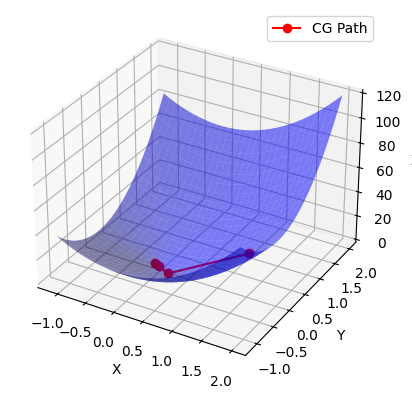


Starting point 2: [ 100 -100    0]
Iteration 1
x = [25.68170311 11.4619688   0.03095306]
f(x) = 10293.5942748469
Gradient = [ 6.17360565e+02  4.11630877e+02 -7.10986715e-02]
Alpha = 0.030953059929058644
Residual = 742.006773073333
----------------------------------------
Iteration 2
x = [-0.0416504   0.02777697  0.03471065]
f(x) = -0.0310932748538648
Gradient = [ 4.33845599e-05 -2.90236207e-05  2.08680386e-01]
Alpha = 0.03739233748508613
Residual = 0.2086803928480674
----------------------------------------
Iteration 3
x = [-4.16666956e-02  2.77777778e-02 -6.94444927e-05]
f(x) = -0.0347222366898249
Gradient = [ 2.53820714e-13  6.61692923e-14 -2.43674438e-16]
Alpha = 0.16666680319303367
Residual = 4.509714547223793e-13
----------------------------------------
Solution: [-4.16666956e-02  2.77777778e-02 -6.94444927e-05]


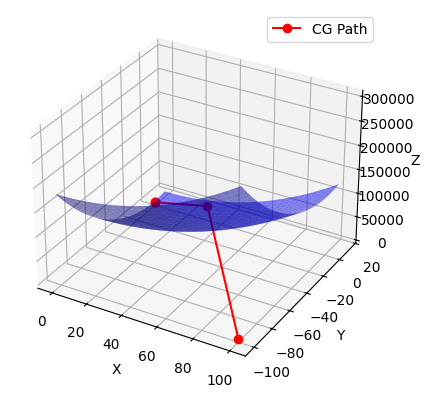


Starting point 3: [  666 10000    -2]
Iteration 1
x = [221.68023055  -6.53566168  -1.48132646]
f(x) = 590712.445803058
Gradient = [5321.34034644 -236.28382045  -11.10476107]
Alpha = 0.0277960096046913
Residual = 5326.595201640214
----------------------------------------
Iteration 2
x = [-0.04262215  0.0277847  -1.0187611 ]
f(x) = 3.07847705446710
Gradient = [-1.27439717e-02  2.49056575e-04 -6.11214038e+00]
Alpha = 0.04163940033734313
Residual = 6.112153671012391
----------------------------------------
Iteration 3
x = [-4.16666956e-02  2.77777778e-02 -6.94444927e-05]
f(x) = -0.0347222366898249
Gradient = [-1.14594334e-12 -4.40749659e-11 -2.74135098e-15]
Alpha = 0.1666665283480711
Residual = 7.320356419764153e-11
----------------------------------------
Solution: [-4.16666956e-02  2.77777778e-02 -6.94444927e-05]


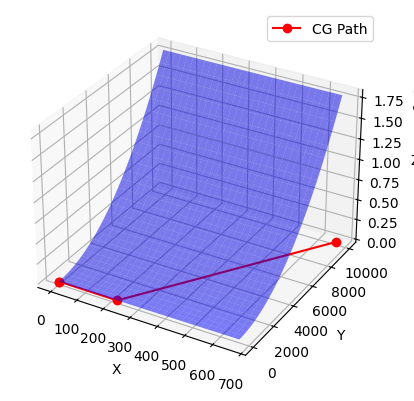


Starting point 4: [  -1   -2 -201]
Iteration 1
x = [ 2.43278386  9.93869567 -3.76784124]
f(x) = 1884.19497112306
Gradient = [ 59.42449115 356.79304407 -22.63137529]
Alpha = 0.16354377628178152
Residual = 362.41512881211196
----------------------------------------
Iteration 2
x = [ 0.78938301 -0.06475482 -0.02293536]
f(x) = 8.40888072927256
Gradient = [19.94542155 -3.33117348 -0.14550596]
Alpha = 0.02856279278731031
Residual = 20.22220882119294
----------------------------------------
Iteration 3
x = [-4.16666956e-02  2.77777778e-02 -6.94444927e-05]
f(x) = -0.0347222366898249
Gradient = [-8.25301629e-15  7.99360578e-15 -2.29929682e-13]
Alpha = 0.04129529928215543
Residual = 3.3633711333822956e-14
----------------------------------------
Solution: [-4.16666956e-02  2.77777778e-02 -6.94444927e-05]


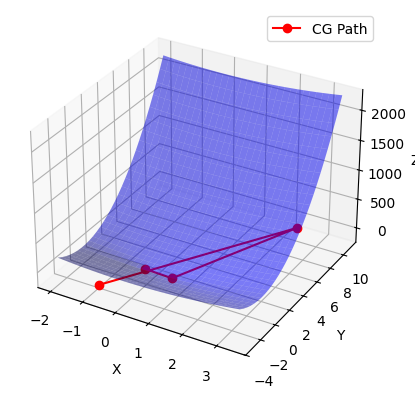

In [7]:
# Define the quadratic function
symbols = create_symbols(3)
x, y, z = symbols
f = 12*x**2 + 18*y**2 + 3*z**2 - 0.01*x*z + x - y

# Example usage with different starting points
starting_points = [np.array([1, 1, 1]), np.array([100, -100, 0]), np.array([666, 10000, -2]), np.array([-1, -2, -201])]

for i, x0 in enumerate(starting_points):
    print(f"\nStarting point {i+1}: {x0}")
    solution, path = conjugate_gradient(f, symbols, x0)
    print(f"Solution: {solution}")
    plot_path(path, lambda x: 12*x[0]**2 + 18*x[1]**2 + 3*x[2]**2 - 0.01*x[0]*x[2] + x[0] - x[1])

#  Метод спряжених градієнтів для декількох квадратичних функцій більшої розмірності

### 5D

In [8]:
symbols_5D = create_symbols(5)
x0, x1, x2, x3, x4 = symbols_5D
f_5D = 2*x0**2 + 3*x1**2 + 4*x2**2 + 5*x3**2 + 6*x4**2 + x0*x1 - x2*x3 + x4

starting_points_5D = [np.zeros(5), np.array([1, 1, 1, 1, 1]), np.array([10, -10, 5, 2, -3])]

for i, x0 in enumerate(starting_points_5D):
    print(f"\nStarting point {i+1}: {x0}")
    solution, path = conjugate_gradient(f_5D, symbols_5D, x0)
    print(f"Solution: {solution}")


Starting point 1: [0. 0. 0. 0. 0.]
Iteration 1
x = [ 0.          0.          0.          0.         -0.08333333]
f(x) = -0.0416666666666667
Gradient = [0. 0. 0. 0. 0.]
Alpha = 0.08333333333333333
Residual = 0.0
----------------------------------------
Solution: [ 0.          0.          0.          0.         -0.08333333]

Starting point 2: [1 1 1 1 1]
Iteration 1
x = [ 0.47729821  0.26821749  0.26821749  0.05913677 -0.35902466]
f(x) = 1.50322309417040
Gradient = [ 2.17741031  2.08660314  2.08660314  0.32315022 -3.30829596]
Alpha = 0.10454035874439462
Residual = 4.949564551374735
----------------------------------------
Iteration 2
x = [ 0.17733152 -0.03660344 -0.03660344 -0.05030807 -0.06520294]
f(x) = 0.0368993350097980
Gradient = [ 0.67272264 -0.0422891  -0.24251943 -0.46647725  0.21756476]
Alpha = 0.11970874616921529
Residual = 0.8820970687695161
----------------------------------------
Iteration 3
x = [ 0.04856291 -0.04320807 -0.0089358   0.02456586 -0.08909874]
f(x) = -0.0296916

### 10D

In [9]:
symbols_10D = create_symbols(10)
f_10D = sum((i+1)*symbols_10D[i]**2 for i in range(10)) + sum(symbols_10D[i]*symbols_10D[i+1] for i in range(9))

starting_points_10D = [np.zeros(10), np.ones(10), np.array([10, -10, 5, 2, -3, 7, -8, 6, 4, -1])]

for i, x0 in enumerate(starting_points_10D):
    print(f"\nStarting point {i+1}: {x0}")
    solution, path = conjugate_gradient(f_10D, symbols_10D, x0)
    print(f"Solution: {solution}")


Starting point 1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Gradient is zero. Convergence may not be achieved.
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Starting point 2: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Iteration 1
x = [ 0.82293726  0.64587453  0.5278327   0.40979088  0.29174906  0.17370723
  0.05566541 -0.06237642 -0.18041824 -0.23943915]
f(x) = 5.86440170171969
Gradient = [ 2.29174906  3.93426808  4.22266163  4.0979088   3.50098868  2.43190125
  0.89064653 -1.12277548 -3.54934388 -4.96920127]
Alpha = 0.05902091197794955
Residual = 10.624031794020276
----------------------------------------
Iteration 2
x = [ 0.61335415  0.28193879  0.12961494  0.01243777 -0.06457176 -0.10141365
 -0.09808791 -0.05459452  0.02404554  0.08093892]
f(x) = 1.06343027603403
Gradient = [ 1.50864709  1.87072426  1.07206622  0.16454536 -0.73469346 -1.37962348
 -1.52923886 -0.94755472  0.4591642   1.64282394]
Alpha = 0.08507077580483778
Residual = 3.9422449900987018
----------------------------------------
Iteration 3
x

# Метод для неквадратичних функцій


Starting point 1: [1 1 1]
Iteration 1
x = [ 1.00799994 -3.00397184  0.98800008]
f(x) = 3.94436760772803
Gradient = [ 0.02394562 -0.01184444  3.96805648]
Alpha = 0.0009999929682115679
Residual = 3.9681463945644335
----------------------------------------
Iteration 2
x = [ 0.99600835 -3.00000806 -0.9999679 ]
f(x) = 0.0000159021364147186
Gradient = [-7.96741803e-03 -1.60624847e-05  4.80821226e-05]
Alpha = 0.5009913758738807
Residual = 0.007976534138321934
----------------------------------------
Iteration 3
x = [ 1.00000423 -3.         -1.00000002]
f(x) = 1.79092290716230E-11
Gradient = [ 8.46373636e-06 -9.21422631e-06 -3.23670815e-08]
Alpha = 0.5009701722982891
Residual = 9.21430114905318e-06
----------------------------------------
Iteration 4
x = [ 1.00000423 -2.99999999 -1.00000002]
f(x) = 1.78667127143875E-11
Gradient = [ 8.44529259e-06  4.86721774e-11 -1.38741294e-08]
Alpha = 0.0009999942586390444
Residual = 1.387466175115661e-08
----------------------------------------
Iteration 5

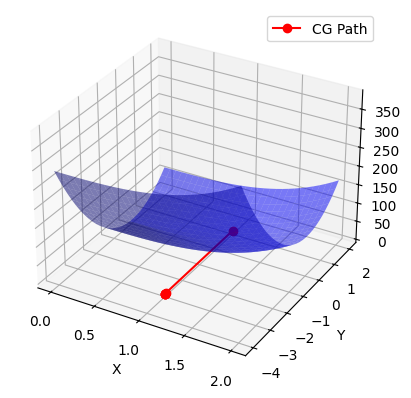


Starting point 2: [ 100 -100    0]
Iteration 1
x = [ 6.69767391e+01 -9.91730887e+01  1.63347220e-03]
f(x) = 23589483.6009509
Gradient = [ 1.14909283e+06 -9.63030389e+04 -1.90342911e+02]
Alpha = 8.507667716471405e-06
Residual = 96333.41421522686
----------------------------------------
Iteration 2
x = [66.99887997 -2.87005863  0.1919763 ]
f(x) = 18977796.8837261
Gradient = [1.15005719e+06 3.27565234e-01 2.64383534e+00]
Alpha = 0.0009993790371228548
Residual = 1447.4949491602674
----------------------------------------
Iteration 3
x = [67.0265713  -2.86964868  0.19192654]
f(x) = 19009663.5554159
Gradient = [1.15150529e+06 6.82029973e-01 2.64455573e+00]
Alpha = 1.9130492364685018e-05
Residual = 2.7310929030798197
----------------------------------------
Iteration 4
x = [67.02673044 -2.87998611  0.15183875]
f(x) = 19009846.7458299
Gradient = [ 1.15151363e+06 -9.73589784e+00  2.54370528e+00]
Alpha = 0.01515855716187778
Residual = 13.07005154788253
----------------------------------------
I

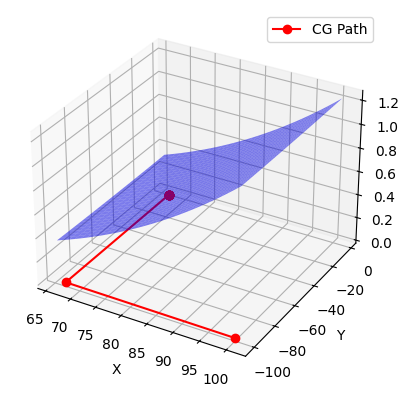


Starting point 3: [  666 10000    -2]
Iteration 1
x = [ 4.44320913e+02  9.99811514e+03 -2.00376985e+00]
f(x) = 88627850780.5509
Gradient = [3.48490405e+08 1.00002265e+07 2.00002227e+04]
Alpha = 1.8845457841131807e-07
Residual = 10000607.969755622
----------------------------------------
Iteration 2
x = [444.3331666   -2.07128981 -22.00391253]
f(x) = 38629857082.8974
Gradient = [ 3.48539306e+08  3.60287863e-02 -4.01504047e+01]
Alpha = 0.0009999237145630448
Residual = 36128.523863899536
----------------------------------------
Iteration 3
x = [444.34848482  -2.07134517 -22.00389562]
f(x) = 38635196362.8160
Gradient = [ 3.48575436e+08 -4.99301533e-02 -4.01504816e+01]
Alpha = 4.239927859362466e-07
Residual = 40.15053689105649
----------------------------------------
Iteration 4
x = [444.34871937  -2.04654526  -1.99683663]
f(x) = 38635277718.5774
Gradient = [ 3.48575989e+08  6.47636265e+01 -8.67637902e-02]
Alpha = 0.498301232039143
Residual = 556.9982647230839
-----------------------------

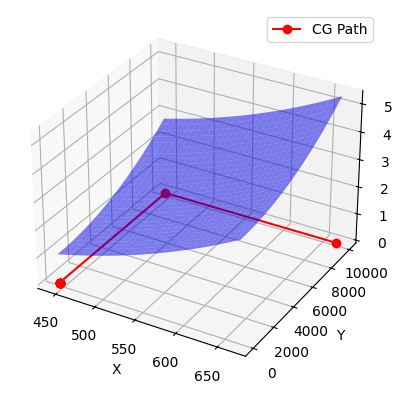


Starting point 4: [  -1   -2 -201]
Iteration 1
x = [  -0.94527778   -2.86979522 -200.42685679]
f(x) = 39746.2253225397
Gradient = [ -33.59551182 -264.75837476 -398.59330402]
Alpha = 0.0014400583058601017
Residual = 479.6847898624829
----------------------------------------
Iteration 2
x = [ 13.93405239  -2.90917966 -30.5122775 ]
f(x) = 29020.5259089797
Gradient = [ 8.68062202e+03  5.92767764e+00 -5.88429143e+01]
Alpha = 0.29646217805825836
Residual = 674.5701065893228
----------------------------------------
Iteration 3
x = [ 13.54035223  -2.9134351  -29.69266247]
f(x) = 25707.9814886439
Gradient = [ 7.91331251e+03  4.09886792e+00 -5.72121952e+01]
Alpha = 0.0006874256604098684
Residual = 132.23760559855154
----------------------------------------
Iteration 4
x = [ 13.63542874  -2.91767968 -29.59182189]
f(x) = 26463.1656986639
Gradient = [ 8.09429619e+03 -1.34179130e-01 -5.70190031e+01]
Alpha = 0.000978744067797909
Residual = 83.11308141364192
----------------------------------------
I

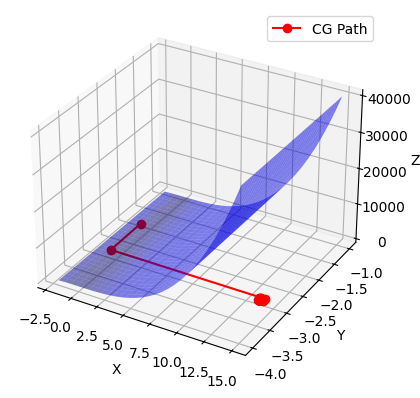

In [26]:
# Define the quadratic function
symbols = create_symbols(3)
x, y, z = symbols
f = (x-1)**2 + 500*(y+3)**2 +(z+1)**2 -2*(x-1)*(y+3) + 2*(y+3)*(z+1) + (x-1)**4

# Example usage with different starting points
starting_points = [np.array([1, 1, 1])
                   , np.array([100, -100, 0]),
                     np.array([666, 10000, -2]),
                       np.array([-1, -2, -201])
                       
                       ]

for i, x0 in enumerate(starting_points):
    print(f"\nStarting point {i+1}: {x0}")
    solution, path = conjugate_gradient(f, symbols, x0)
    print(f"Solution: {solution}")
    plot_path(path, lambda x: 12*x[0]**3 + 18*x[1]**2 + 3*x[2]**2 - 0.01*x[0]*x[2] + x[0] - x[1])

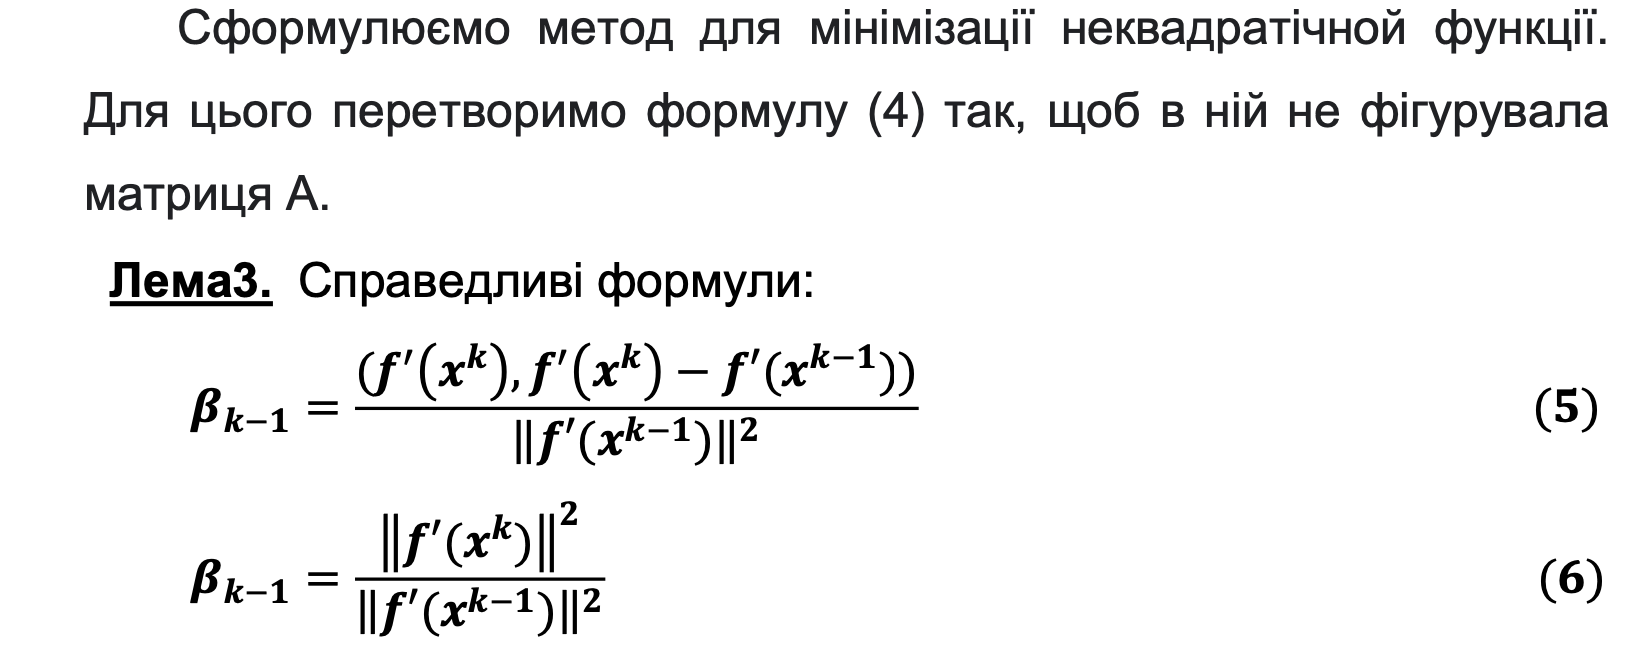

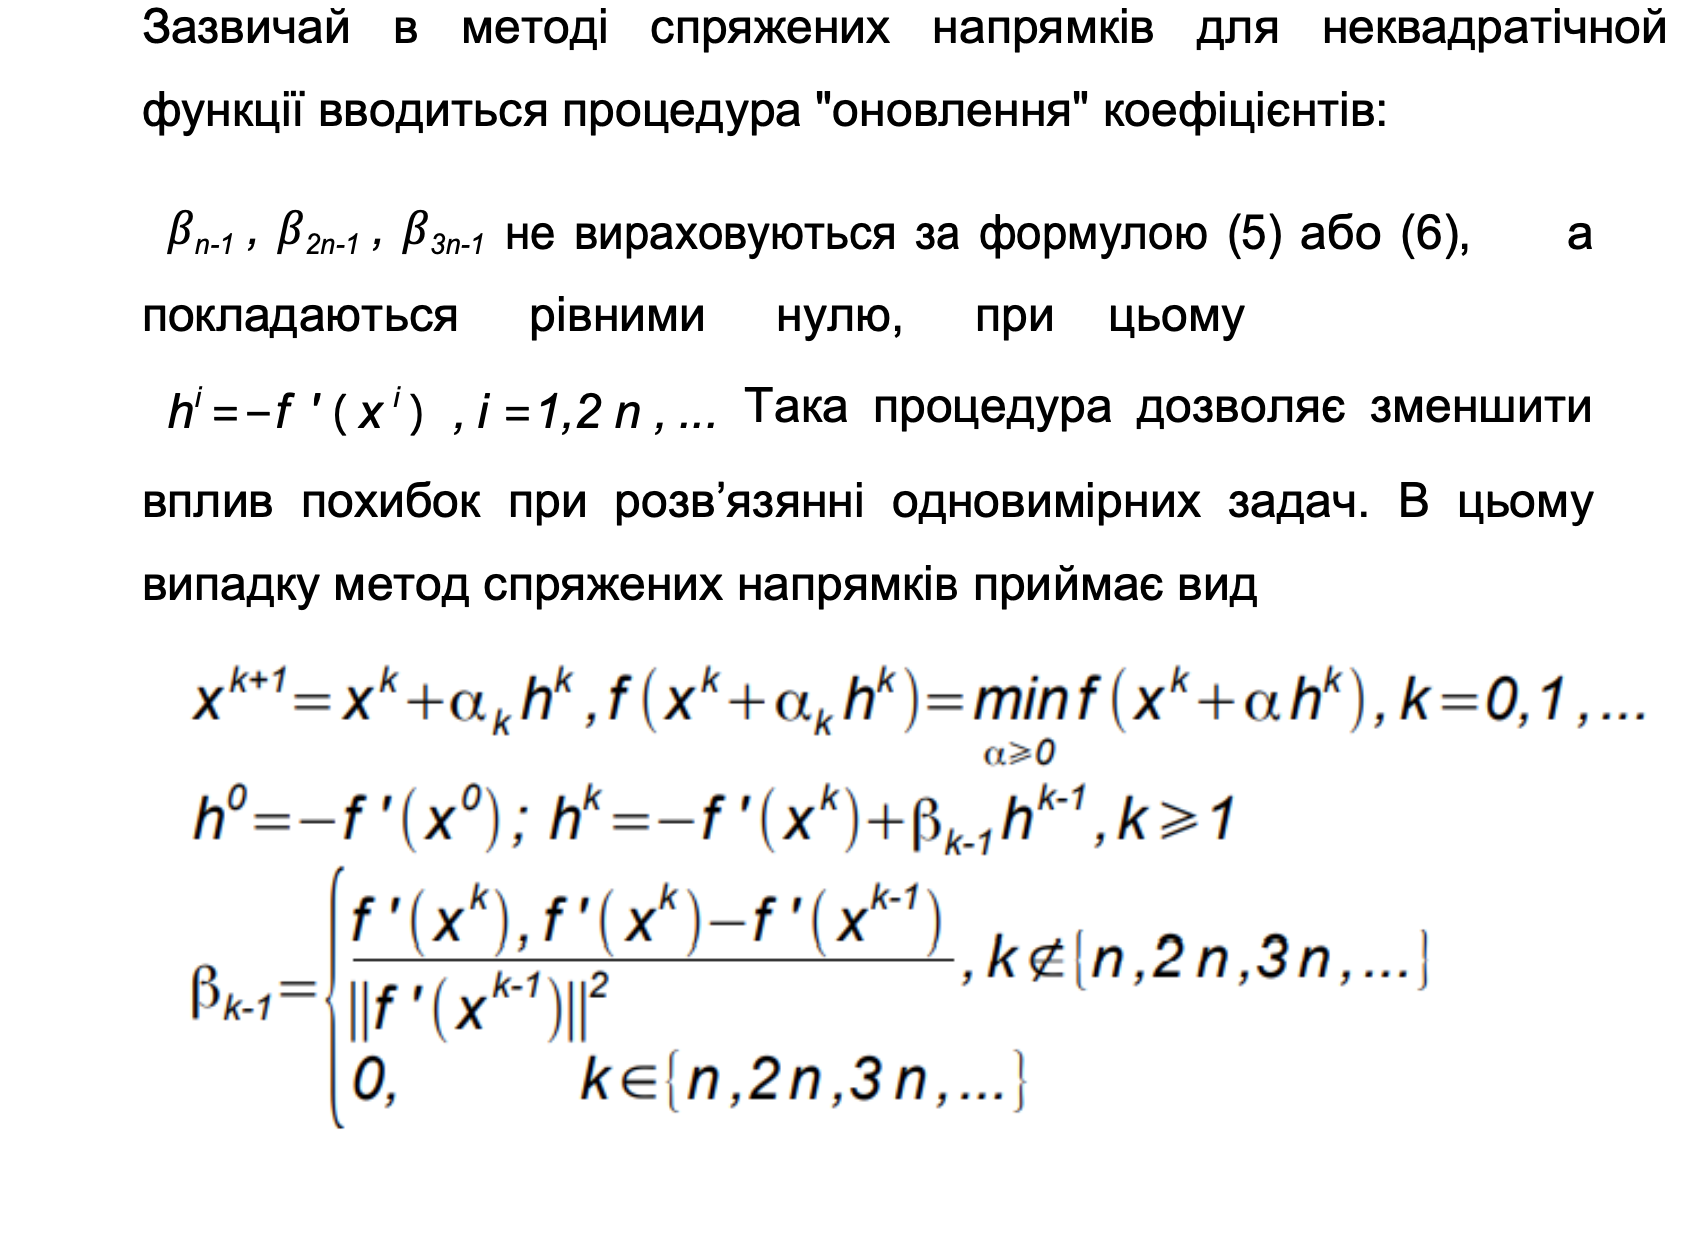

In [22]:
# Conjugate Gradient Method for Non-Quadratic Functions

def non_quadratic_conjugate_gradient(f, symbols, x0, tol=1e-5, max_iter=1000):
    x = np.array(x0, dtype=float)
    r = -grad(f, symbols, x)  # r0 = -∇f(x0)
    p = r.copy()              # p0 = r0
    rs_old = r.T @ r
    path = [x.copy()]

    for i in range(max_iter):
        
        H = hessian(f, symbols, x)
        Ap = H @ p

        if np.allclose(Ap, 0):
            print("Gradient is zero. Convergence may not be achieved.")
            break

        grad_x = grad(f, symbols, x)

        alpha = rs_old / (p.T @ Ap)

        x = x + alpha * p
        r_new = -grad(f, symbols, x)
        rs_new = r_new.T @ r_new
        path.append(x.copy())

        # Print current iteration details
        current_gradient = grad(f, symbols, x)
        current_function_value = f.subs(dict(zip(symbols, x)))


        if np.sqrt(rs_new) < tol:
            break

         # Refresh direction every n iterations
        if (i + 1) % len(symbols) == 0:
            beta = 0
        else:
            grad_diff = current_gradient - grad(f, symbols, path[-2])
            beta = (current_gradient @ grad_diff) / np.linalg.norm(grad(f, symbols, path[-2])) ** 2


        # Print current iteration details
        print(f'Iteration {i+1}')
        print(f'x = {x}')
        print(f'f(x) = {current_function_value}')
        print(f'Gradient = {current_gradient}')
        print(f'Alpha = {alpha}')
        print(f'Residual = {np.sqrt(rs_new)}')
        print(f'Beta = {beta}')
        print('----------------------------------------')

        p = r_new + beta * p

        r = r_new
        rs_old = rs_new

    return x, np.array(path)

# Plot Path Function
def non_quadratic_plot_path(path, f, symbols, resolution=0.05):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the path
    x_vals = path[:, 0]
    y_vals = path[:, 1]
    z_vals = [f.subs(dict(zip(symbols, [x, y]))) for x, y in zip(x_vals, y_vals)]
    ax.plot(x_vals, y_vals, z_vals, 'r-o', label='CG Path')

    # Generate a mesh grid to plot the surface
    x_range = np.linspace(np.min(x_vals) - 1, np.max(x_vals) + 1, 100)
    y_range = np.linspace(np.min(y_vals) - 1, np.max(y_vals) + 1, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.zeros_like(X)

    for i in range(len(x_range)):
        for j in range(len(y_range)):
            Z[i, j] = f.subs(dict(zip(symbols, [X[i, j], Y[i, j]])))

    # Plot the function surface
    ax.plot_surface(X, Y, Z, alpha=0.5, rstride=1, cstride=1, color='blue', edgecolor='none', antialiased=True)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    plt.show()

In [23]:
# Define the quadratic function
symbols = create_symbols(3)
x, y, z = symbols
f = 12*x**3 + 18*y**2 + 3*z**2 - 0.01*x*z + x - y

# Example usage with different starting points
starting_points = [np.array([1, 1, 1])
                #    , np.array([100, -100, 0])
                #    , np.array([666, 10000, -2]), np.array([-1, -2, -201])
                   ]

for i, x0 in enumerate(starting_points):
    print(f"\nStarting point {i+1}: {x0}")
    solution, path = non_quadratic_conjugate_gradient(f, symbols, x0)
    print(f"Solution: {solution}")
    # non_quadratic_plot_path(path, f, symbols)


Starting point 1: [1 1 1]
Iteration 1
x = [0.31908627 0.35571829 0.88973579]
f(x) = 5.00291449959893
Gradient = [ 4.65648035 11.80585834  5.33522386]
Alpha = 0.018408048938473014
Residual = 13.76683384054185
Beta = -0.16274542035774583
----------------------------------------
Iteration 2
x = [ 0.4912744  -0.41586268  0.33907904]
f(x) = 5.78617895542591
Gradient = [  9.68522841 -15.97105648   2.02956153]
Alpha = 0.12628644627347288
Residual = 18.788225423658076
Beta = 2.562302464150423
----------------------------------------
Iteration 3
x = [-0.41797868 -0.36945997 -1.59969555]
f(x) = 9.20260300149158
Gradient = [  7.30541942 -14.30055901  -9.59399349]
Alpha = 0.1468527118890184
Residual = 18.706144764467897
Beta = 0
----------------------------------------
Iteration 4
x = [-0.82311413  0.42360379 -1.06764302]
f(x) = -1.29808251659750
Gradient = [25.40128385 14.24973626 -6.39762699]
Alpha = 0.05545683613342207
Residual = 29.819621658027565
Beta = 2.417819969989747
--------------------

## Rosenbrock function

#### Функція Розенброка, також відома як долина Розенброка або бананова функція Розенброка, є неопуклою функцією, яка використовується для тестування продуктивності алгоритмів оптимізації. Вона визначається наступним чином

$$ f(x, y) = (a - x)^2 + b(y - x^2)^2 $$

де зазвичай \( a = 1 \) and \( b = 100 \).

#### Характеристики:

    Глобальний мінімум: Глобальний мінімум знаходиться всередині довгої, вузької, параболічної форми плоскої долини. Знайти долину тривіально, але збіжність до глобального мінімуму є складною і, таким чином, перевіряє надійність алгоритму оптимізації.
    Квадратична поведінка: Поблизу глобального мінімуму функція поводиться квадратично, що полегшує збіжність градієнтних методів при наближенні до оптимуму.
    Складний ландшафт: Форма долини функції тестує здатність алгоритму орієнтуватися в залежному від шляху просторі пошуку.

#### Чому обрано для тестування:

    Плавність і диференційованість: Функція є гладкою та диференційованою, що ідеально підходить для градієнтних методів.
    Складність збіжності: Незважаючи на свій простий вигляд, функція створює проблеми через вузьку долину, що робить її чудовим бенчмарком для оцінки ефективності та збіжності алгоритмів оптимізації.


In [13]:
# Define the Rosenbrock function
a, b = 1, 100
x, y = sp.symbols('x y')
rosenbrock = (a - x)**2 + b * (y - x**2)**2
symbols = [x, y]

Starting point: [-1, 1]
Iteration 1
x = [-0.99501247  1.        ]
f(x) = 3.98997537266753
Gradient = [-0.02980093  1.99003738]
Alpha = 0.0012468827930174563
Residual = 1.99501246882793
----------------------------------------
Iteration 2
x = [-3.06195639  5.14422256]
f(x) = 1806.93546404881
Gradient = [-5190.61292067  -846.27087256]
Alpha = -2.0772915568550316
Residual = 18.340029274311384
----------------------------------------
Iteration 3
x = [-3.06076196  5.14110251]
f(x) = 1803.37903057044
Gradient = [-5183.45529602  -845.43225462]
Alpha = 1.7648877373976014e-05
Residual = 25.241720070702023
----------------------------------------
Iteration 4
x = [-3.05891644  5.1350363 ]
f(x) = 1798.94702577519
Gradient = [-5173.93450886  -844.38669415]
Alpha = 1.7639545335842522e-05
Residual = 34.60019615036526
----------------------------------------
Iteration 5
x = [-3.05607356  5.12362461]
f(x) = 1793.88445573253
Gradient = [-5161.82693781  -843.19220181]
Alpha = 1.7389383935293672e-05
Resid

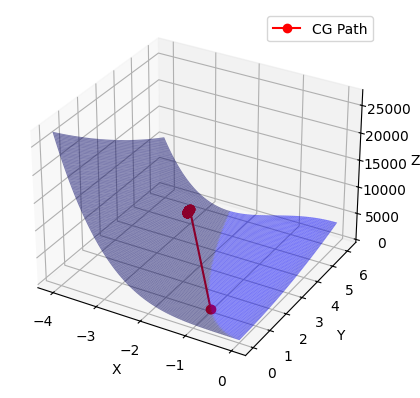

Starting point: [0, 0]
Iteration 1
x = [1. 0.]
f(x) = 100.000000000000
Gradient = [ 400. -200.]
Alpha = 0.5
Residual = 0.0
----------------------------------------
Result: [1. 0.]



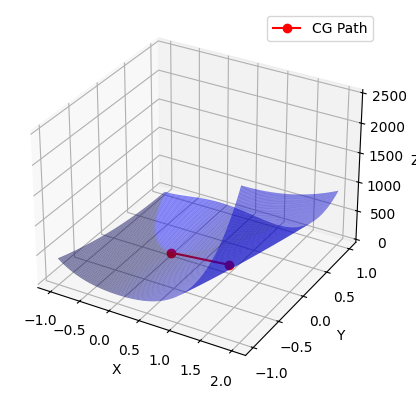

Starting point: [2, 2]
Iteration 1
x = [1.61443431 2.09627108]
f(x) = 26.4004921391844
Gradient = [ 330.65552609 -102.02541372]
Alpha = 0.00024067770714659363
Residual = 74.51269067688715
----------------------------------------
Iteration 2
x = [2.08721411 4.43350466]
f(x) = 1.77558045408780
Gradient = [-62.14677525  15.40838653]
Alpha = 0.031969685079713234
Residual = 453.1520817832767
----------------------------------------
Iteration 3
x = [2.55427398 5.66538221]
f(x) = 76.1924227571081
Gradient = [ 880.68902289 -171.78667601]
Alpha = 0.000471250853408648
Residual = 151.53316620798645
----------------------------------------
Iteration 4
x = [2.54039748 5.82096161]
f(x) = 42.3984045178762
Gradient = [ 645.96163356 -126.53154568]
Alpha = 0.0004496114274137898
Residual = 94.8642781189312
----------------------------------------
Iteration 5
x = [2.58450513 5.89807148]
f(x) = 63.5997796903453
Gradient = [ 811.18384903 -156.31906239]
Alpha = 0.0005353298286239171
Residual = 76.18255842231

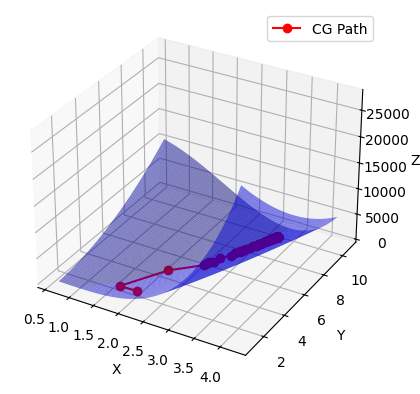

Starting point: [-2, 2]
Iteration 1
x = [-1.6134919   2.09626603]
f(x) = 32.5443734507180
Gradient = [-332.5012688  -101.41801332]
Alpha = 0.00024066507160255132
Residual = 73.7258865784279
----------------------------------------
Iteration 2
x = [-2.08120196  4.40850151]
f(x) = 10.0882449830046
Gradient = [58.02178041 15.41997976]
Alpha = 0.03196607859614156
Residual = 449.1468657766606
----------------------------------------
Iteration 3
x = [-2.55299889  5.65392109]
f(x) = 87.2530494825419
Gradient = [-889.30213205 -172.77644331]
Alpha = 0.0004798286153659486
Residual = 154.20889547185854
----------------------------------------
Iteration 4
x = [-2.53988075  5.82106626]
f(x) = 52.2116802353020
Gradient = [-647.05652962 -125.98559364]
Alpha = 0.00046352645511484026
Residual = 99.74664485284427
----------------------------------------
Iteration 5
x = [-2.58739254  5.90712555]
f(x) = 74.8810151868431
Gradient = [-822.17718391 -157.4949268 ]
Alpha = 0.0005423707808300522
Residual = 80.4

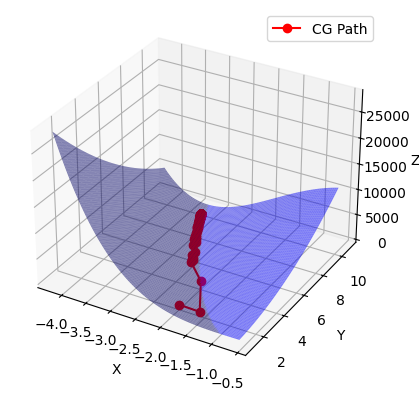

Starting point: [1, -1]
Iteration 1
x = [ 0.51267057 -0.75633528]
f(x) = 104.107503268661
Gradient = [ 208.02398509 -203.83327824]
Alpha = 0.0006091617933723197
Residual = 174.7881596447204
----------------------------------------
Iteration 2
x = [0.88149886 0.57292188]
f(x) = 4.18047283749463
Gradient = [ 71.73503657 -40.82367115]
Alpha = 0.0077457693751185885
Residual = 126.72114370229556
----------------------------------------
Iteration 3
x = [1.11638461 0.66283226]
f(x) = 34.0587095769888
Gradient = [ 260.78905183 -116.69646815]
Alpha = 0.001596382791082203
Residual = 33.14783429446471
----------------------------------------
Iteration 4
x = [1.10989354 0.78961842]
f(x) = 19.5701624686901
Gradient = [196.55784396 -88.44904947]
Alpha = 0.00364211763773239
Residual = 52.83588369798123
----------------------------------------
Iteration 5
x = [1.39820848 1.33437652]
f(x) = 38.6743016915084
Gradient = [ 347.89352844 -124.1220878 ]
Alpha = 0.00597683464765992
Residual = 46.4951936207763

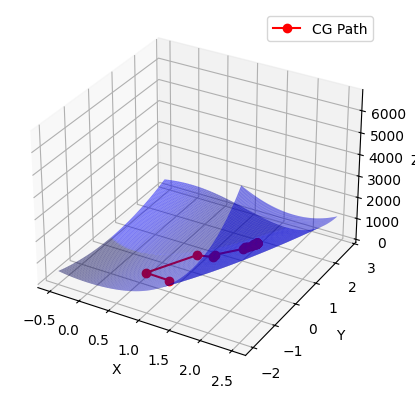

In [14]:
starting_points = [[-1, 1], [0, 0], [2, 2], [-2, 2], [1, -1]]

for start in starting_points:
    print(f"Starting point: {start}")
    result, path = conjugate_gradient(rosenbrock, symbols, start)
    print(f"Result: {result}\n")
    non_quadratic_plot_path(path, rosenbrock, symbols)


# Висновок 

Метод збіжних градієнтів є потужним ітераційним методом для розв'язання систем лінійних рівнянь Ax=b, де A - симетрична та позитивно визначена матриця, x - вектор невідомих, b - вектор правої частини. Основна ідея методу полягає в тому, щоб на кожній ітерації шукати новий напрямок пошуку, який спрямований вздовж спряжених градієнтів. Це дозволяє швидко збігатися до точного розв'язку.

Зауважимо, що метод збіжних градієнтів гарантує збіжність до точного розв'язку за n ітерацій, де n - розмір системи рівнянь. Крім того, метод є оптимальним в тому сенсі, що на кожній ітерації максимізується зменшення розмірності помилки в підпросторі спряжених напрямків.

Для розв'язання систем лінійних рівнянь з великою розмірністю або великою розрідженістю матриці A, метод збіжних градієнтів стає особливо ефективним, оскільки він не вимагає зберігання у пам'яті всієї матриці, але може обчислювати добре обумовлені проекції на спряжені напрямки.

Отже, метод збіжних градієнтів є важливим інструментом для числових обчислень у різних галузях науки і техніки, включаючи інженерію, фізику, економіку та комп'ютерні науки.